In [1]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/NLP_Workspace/Data/'

import matplotlib.pyplot as plt
import csv
import pandas as pd

Mounted at /content/drive


In [2]:
df = pd.read_csv(data_path + "balanced_data.csv")
df = df.dropna(how='any',axis=0)

In [3]:
df.sample(10)

,type,text,word_num,label
14032,ENFP,"Your username is SocioApathetic. :p And I, fo...",16,1
126841,INTJ,i always try to plan for chaos and worse case ...,21,10
9049,ENFJ,It's like a Vulcan mindmeld for me -- uncontro...,33,0
17476,ENFP,Its kinda weird when you poke around on a man'...,35,1
109705,INFJ,To go on swimming on near lake with friends...,9,8
135006,INTJ,my weakness is that i hate stupid boring bulls...,32,10
169552,ISFP,"I'm right there with ya, sister! I'll be follo...",27,13
97589,ESTP,"I fucked up lol. Either way, I the interview w...",16,7
96146,ESTP,"And still the OP is nowhere to be seen, a thre...",24,7
85368,ESTJ,"Actually, my biggest problem with my ISFP frie...",35,6


In [4]:
df_label = df['label']

In [5]:
df_label.sample(10)

60755      4
19104      1
26690      2
163663    13
76214      6
31645      2
40931      3
26568      2
104030     8
19168      1
Name: label, dtype: int64

In [6]:
df_data = df['text']

In [7]:
df_data.sample(10)

96439                                   Right on! Thanks :)
109639    the beginning: i am 17 (august 25). i was born...
197059    I can seriously get into cooking BBQ. The real...
173664    liza_200 I can see your point...but doesn't th...
113447    -Nonconforming attitude I don't know, I try no...
172203    WTF IS DIZ SHIT  THIS IS HOW ISFPs ROLL!!!  [/...
65627     Helloooo lady friends...  I am currently worki...
151384    I can't edit the above again, but I'd like to ...
3026      I usually raid this thread with all my negativ...
60717     He's always been a knight in shining armor. He...
Name: text, dtype: object

In [8]:
df_label.describe()

count    200254.000000
mean          7.500075
std           4.609746
min           0.000000
25%           4.000000
50%           8.000000
75%          11.750000
max          15.000000
Name: label, dtype: float64

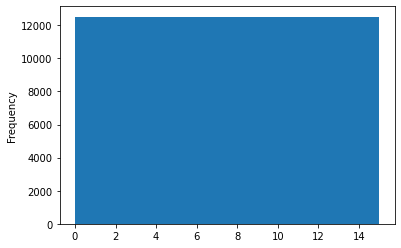

In [9]:
ax = df_label.plot.hist(bins=16)

In [10]:
E_class = [0, 1, 2, 3, 4, 5, 6, 7]     ### See Data Preprocessing Code --> duplication_reduction.ipynb
I_class = [8, 9, 10, 11, 12, 13, 14, 15]

N_class = [0, 1, 2, 3, 8, 9, 10, 11]
S_class = [4, 5, 6, 7, 12, 13, 14, 15]

F_class = [0, 1, 4, 5, 8, 9, 12, 13]
T_class = [2, 3, 6, 7, 10, 11, 14, 15]

J_class = [0, 2, 4, 6, 8, 10, 12, 14]
P_class = [1, 3, 5, 7, 9, 11, 13, 15]

In [11]:
df_all = pd.concat([df_label, df_data], axis=1)

In [12]:
df_all.sample(10)

,label,text
94337,7,This is how you treat your figments of imagina...
99882,7,"You know, I made this video recently to test o..."
198326,15,i'm more content than happy. only time i'm hap...
109523,8,"If I had to choose, I'd vote for Hollory Clont..."
3053,0,I think there's something wrong with me. I tho...
20636,1,Hmmm flair and pizzazz.....fantabulous and piz...
81229,6,I recall in high school taking mass amounts of...
71377,5,Intelligence isn't IQ. Intelligence is Emotion...
177900,14,"Yes, some of this does sound familiar to me. ..."
100323,8,"Shit, he's not INFJ. He reminds me a lot of an..."


In [13]:
df_E = df_all[df_all['label'].isin(E_class)]
df_I = df_all[df_all['label'].isin(I_class)]

df_N = df_all[df_all['label'].isin(N_class)]
df_S = df_all[df_all['label'].isin(S_class)]

df_F = df_all[df_all['label'].isin(F_class)]
df_T = df_all[df_all['label'].isin(T_class)]

df_J = df_all[df_all['label'].isin(J_class)]
df_P = df_all[df_all['label'].isin(P_class)]

In [14]:
df_P.sample(20)

,label,text
40992,3,:D I'm a Nightowl. I wake up between 6-7pm and...
117596,9,You know the person (significant other) that y...
90065,7,"Yeah that is what I´ll probably do, no point i..."
39277,3,"we try having a thread for functions, like You..."
147464,11,"That sounds about right, though I am a bit unc..."
172581,13,If you read the books it's a bit more obvious ...
89820,7,I left the States a few years ago and moved to...
97299,7,I will say one of things that ticks me off the...
190722,15,Here's a thought for you. Sit tight a bit lon...
41085,3,You see me. You see all the dangers of me. Thi...


In [15]:
df_E = df_E.assign(label=0)
df_N = df_N.assign(label=0)
df_F = df_F.assign(label=0)
df_J = df_J.assign(label=0)

df_I = df_I.assign(label=1)
df_S = df_S.assign(label=1)
df_T = df_T.assign(label=1)
df_P = df_P.assign(label=1)

In [16]:
df_P.sample(10)

,label,text
113781,1,"I've met one other INFP, we definitely got alo..."
95045,1,I had come to the conclusion that I was an ENT...
63771,1,Do you think that someone should take this int...
116772,1,So true. It always blew my mind how many frie...
39773,1,This is not personality type dependent. I have...
20276,1,"yea, I did the same thing, with people who I f..."
115004,1,"Yeah, you're right about that. We can never be..."
21473,1,"Hahahaha, no way! My INFJ friend and I have ha..."
141948,1,"Not the rest of Asia maybe, but Japan. Perfect..."
45647,1,You can't spend all day inside Your dominant ...


In [17]:
df_EI = pd.concat([df_E, df_I], axis=0)
df_NS = pd.concat([df_N, df_S], axis=0)
df_FT = pd.concat([df_F, df_T], axis=0)
df_JP = pd.concat([df_J, df_P], axis=0)

In [18]:
df_EI.describe()

,label
count,200254.000000
mean,0.500005
std,0.500001
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
df_EI.to_csv(data_path+"BERT_data/E_vs_I_data.csv", index=False)
df_NS.to_csv(data_path+"BERT_data/N_vs_S_data.csv", index=False)
df_FT.to_csv(data_path+"BERT_data/F_vs_T_data.csv", index=False)
df_JP.to_csv(data_path+"BERT_data/J_vs_P_data.csv", index=False)